## Import vital libraries

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model

## Define the file paths

In [54]:
train_file_path = 'train'
test_file_path = 'test'

## Load/resize the image from directory

In [55]:
image_size =(180, 180)

In [56]:
data_train = tf.keras.utils.image_dataset_from_directory(
    train_file_path,
    shuffle= True,
    image_size= image_size,
    batch_size=32,
    validation_split=0.2,
    seed=123,
    subset='training'
)

Found 557 files belonging to 2 classes.
Using 446 files for training.


In [57]:
data_val = tf.keras.utils.image_dataset_from_directory(
    train_file_path,
    shuffle= True,
    image_size= image_size,
    batch_size=32,
    validation_split=0.2,
    seed=123,
    subset='validation'
)

Found 557 files belonging to 2 classes.
Using 111 files for validation.


In [58]:
data_test = tf.keras.utils.image_dataset_from_directory(
    test_file_path,
    shuffle= False,
    image_size= image_size,
    batch_size=32,
    validation_split=False
)

Found 140 files belonging to 2 classes.


## Display the image classes

In [59]:
data_cat = data_train.class_names
data_cat

['cats', 'dogs']

## Apply rescaling to normalize pixel values

In [60]:
data_train = data_train.map(lambda x, y: (x / 255.0, y))
data_val = data_val.map(lambda x, y: (x / 255.0, y))
data_test = data_test.map(lambda x, y: (x / 255.0, y))

## Visualize the image classes

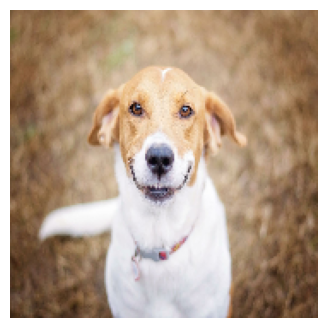

In [101]:
idx = 0 
plt.figure(figsize=(4,4))
for image, label in data_train.take(1):
    image = image[idx].numpy()
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## Set up the model using functional api

In [62]:

# Define the input layer with the shape of the input images
input_shape = (180, 180, 3)  
input_layer = Input(shape=input_shape)

# Add convolutional and pooling layers
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

# Flatten the output of the convolutional layers
x = Flatten()(x)

# Define the fully connected layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Add the output layer
output_layer = Dense(1, activation='sigmoid')(x)  

In [63]:
# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# compile the model
loss = keras.losses.BinaryCrossentropy()
optim =keras.optimizers.Adam(learning_rate=0.001)
metric = ['accuracy']

model.compile(optimizer=optim, loss=loss, metrics=metric)

# print model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 128)       7385

 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               6553728   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 6,647,105
Trainable params: 6,647,105
Non-trainable params: 0
_________________________________________________________________


## Fit the model for training

In [75]:
model.fit(data_train, validation_data=data_val, batch_size=32, epochs=5)

Epoch 1/5


14/14 [==============================] - 20s 1s/step - loss: 0.3239 - accuracy: 0.8789 - val_loss: 0.8519 - val_accuracy: 0.6757
Epoch 2/5
14/14 [==============================] - 20s 1s/step - loss: 0.2580 - accuracy: 0.8722 - val_loss: 0.8761 - val_accuracy: 0.6847
Epoch 3/5
14/14 [==============================] - 21s 1s/step - loss: 0.1864 - accuracy: 0.9260 - val_loss: 1.2397 - val_accuracy: 0.6847
Epoch 4/5
14/14 [==============================] - 26s 2s/step - loss: 0.1374 - accuracy: 0.9484 - val_loss: 1.2049 - val_accuracy: 0.6847
Epoch 5/5
14/14 [==============================] - 33s 2s/step - loss: 0.0877 - accuracy: 0.9753 - val_loss: 1.3741 - val_accuracy: 0.6847


In [76]:
model.evaluate(data_test)

5/5 [==============================] - 1s 176ms/step - loss: 1.0558 - accuracy: 0.6714


[1.0558010339736938, 0.6714285612106323]

## Predict the model

In [86]:
predictions = model.predict(data_test)
predictions[0]

5/5 [==============================] - 1s 174ms/step


array([0.21494997], dtype=float32)

## Save the model

In [ ]:
model.save('animal prediction')

## Load the saved model

1/1 [==============================] - 0s 451ms/step


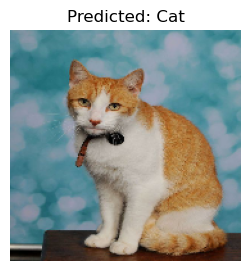

1/1 [==============================] - 0s 238ms/step


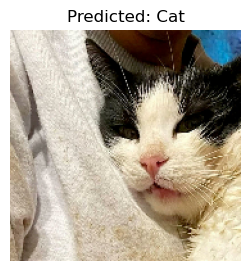

1/1 [==============================] - 0s 196ms/step


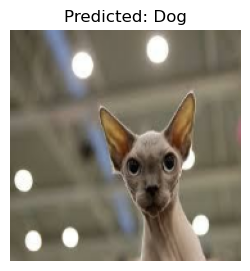

1/1 [==============================] - 0s 230ms/step


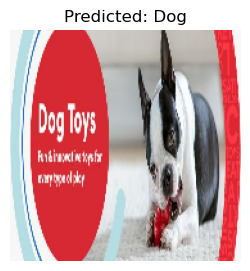

1/1 [==============================] - 0s 185ms/step


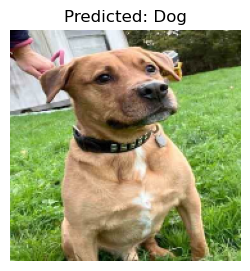

In [89]:
model = keras.models.load_model("animal prediction")

# Iterate through the data_test dataset
for image, label in data_test:
    # Make predictions
    predictions = model.predict(image)
    
    # Interpret predictions
    predicted_class = "Dog" if predictions[0][0] > 0.5 else "Cat"
    
    # Convert the image tensor to numpy array for plotting
    image_np = image.numpy()[0]
    
    # Plot the image
    plt.figure(figsize=(3, 3))
    plt.imshow(image_np)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}")
    plt.show()